# Predicting Survivors of Titanic

This notebook looks into using various Python-based machine learning tools and libraries to build a model capable of predicting whether or not someone would survive the disaster that sunk Titanic

We are going to:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In a statement,
>Given parameters about a passenger, can we predict whether or not they would survive the disaster

## 2. Data

The original data is from Kaggle: https://www.kaggle.com/competitions/titanic/data

## 3. Evaluation

> The goal is to predict if someone would survive the disaster. The prediction metric is accuracy.

## 4. Features

**Create data dictionary**

Variable:	Definition - Key
* survival:	Survival - 0 = No, 1 = Yes
* pclass:	Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
* sex:  	Sex
* Age:  	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:    # of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare: 	Passenger fare	
* cabin:    Cabin number	
* embarked:	Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton


## 5. Preparing the tool

In [39]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots to appear inside notebook
%matplotlib inline 

#A Preprocessing tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## 6. Load Data

In [40]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 7. Data Exploration (EDA)

In [41]:
# Checking the data
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [42]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


We can see that the Survived column is missing in our test data. This is because it is the label - the rest are features

In [43]:
# Lets review the shape of the Training data set
train.shape

(891, 12)

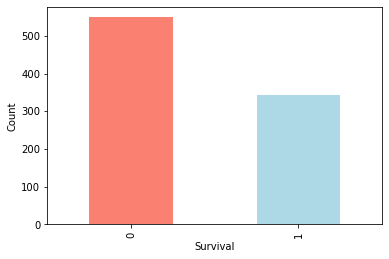

In [44]:
# Find out how many survived in the training data set
train["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], xlabel="Survival", ylabel="Count");

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note: Name, Sex, Ticket, Cabin, Embarked are feature with data type 'object'

In [46]:
# Checking for missing information
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, and Embarked are the features with missing data

In [47]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
# Comparing Sex with Survival
pd.crosstab(train.Survived, train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


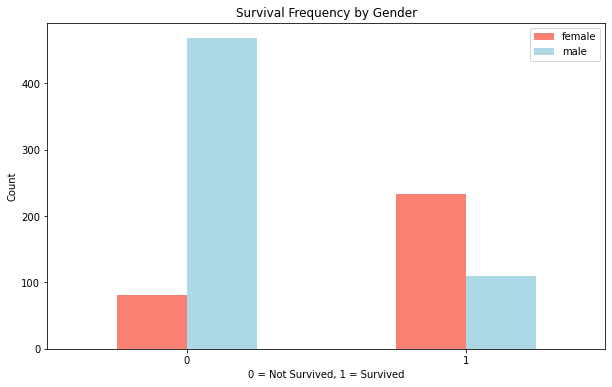

In [51]:
pd.crosstab(train.Survived, train.Sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);
plt.title("Survival Frequency by Gender")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["female","male"])
plt.xticks(rotation=0);

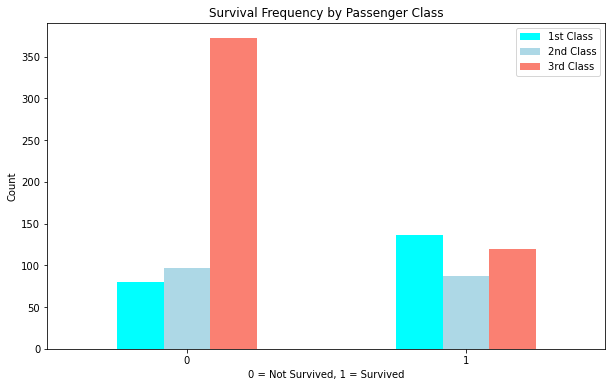

In [52]:
pd.crosstab(train.Survived, train.Pclass).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["Aqua","lightblue", "salmon"]);
plt.title("Survival Frequency by Passenger Class")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["1st Class","2nd Class", "3rd Class"])
plt.xticks(rotation=0);

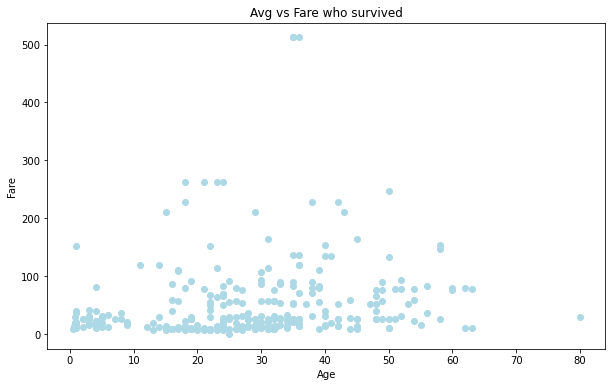

In [53]:
# Age and Fare vs Survival

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(train.Age[train.Survived==1],
           train.Fare[train.Survived==1],
           c="lightblue");
plt.title("Avg vs Fare who survived")
plt.xlabel("Age")
plt.ylabel("Fare");

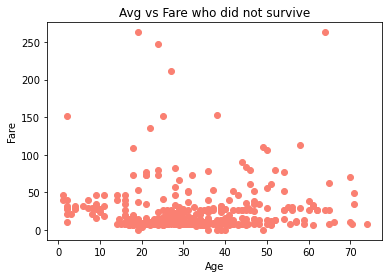

In [54]:
# Scatter with negative examples
plt.scatter(train.Age[train.Survived==0],
           train.Fare[train.Survived==0],
           c="salmon");
plt.title("Avg vs Fare who did not survive")
plt.xlabel("Age")
plt.ylabel("Fare");

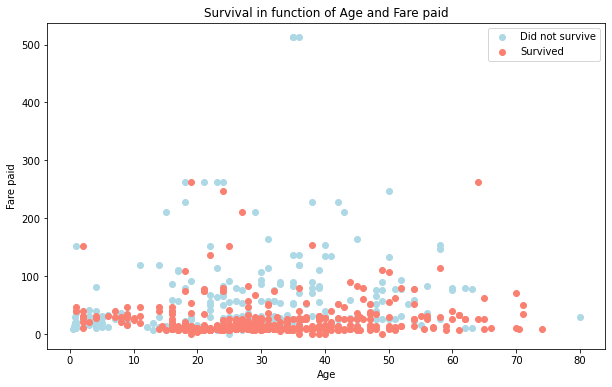

In [55]:
# Both together
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(train.Age[train.Survived==1],
           train.Fare[train.Survived==1],
           c="lightblue");
# Scatter with negative examples
plt.scatter(train.Age[train.Survived==0],
           train.Fare[train.Survived==0],
           c="salmon");
plt.title("Survival in function of Age and Fare paid")
plt.xlabel("Age")
plt.ylabel("Fare paid")
plt.legend(["Did not survive", "Survived"]);

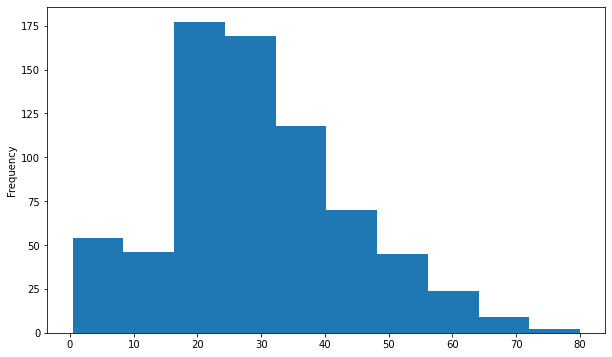

In [56]:
# Check distribution of the Age column with a Histogram
plt.figure(figsize=(10,6))
train.Age.plot.hist();

In [57]:
# Making a correlation matrix
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


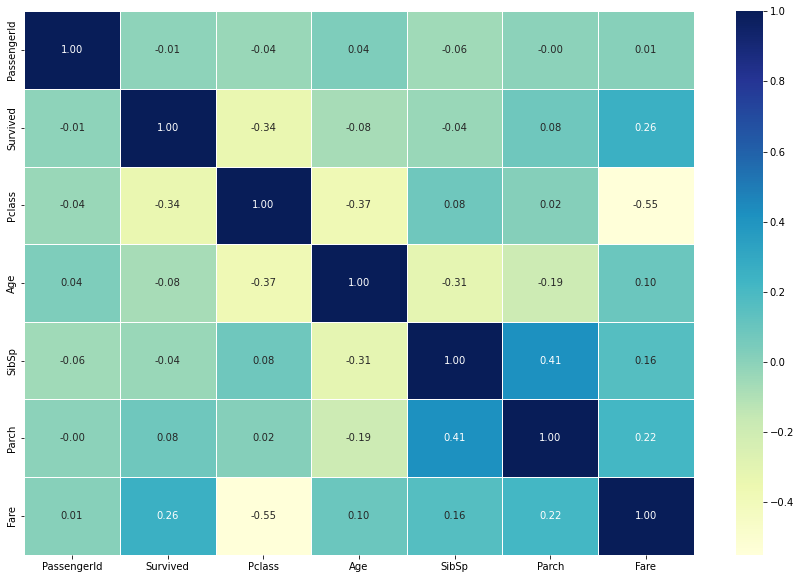

In [58]:
# Visual correlation matrix
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## 5 Data Preprocessing
In this section:
* Splitting X and Y for train data
* Filling missing data: Age, Cabin, and Embarked are the featuers with missing data
* Turning strings into numerical values: Name, Sex, Ticket, Cabin, Embarked
* Ensuring same shape

### Setting up X and Y

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]
X.shape, y.shape

((891, 11), (891,))

### Splitting Train data

In [61]:
np.random.seed(16)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((712, 11), (179, 11), (712,), (179,))

In [62]:
test.shape

(418, 11)

### Filling missing values

In [63]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         2
dtype: int64

In [64]:
X_valid.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             32
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          137
Embarked         0
dtype: int64

In [65]:
processed_test = test
processed_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [66]:
processed_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [67]:
# Fill the Age column with average age
X_train["Age"].fillna(X_train["Age"].mean(), inplace = True)
X_valid["Age"].fillna(X_train["Age"].mean(), inplace = True)
processed_test["Age"].fillna(processed_test["Age"].mean(), inplace = True)

# Fill the Fare column with average fare
processed_test["Fare"].fillna(processed_test["Fare"].mean(), inplace = True)

# Fill the Cabin column with a 'missing' label
X_train["Cabin"].fillna("missing", inplace = True)
X_valid["Cabin"].fillna("missing", inplace = True)
processed_test["Cabin"].fillna("missing", inplace = True)

# Fill the Embarked column as 'missing' label
X_train["Embarked"].fillna("missing", inplace = True)

In [68]:
X_train.shape, X_valid.shape, processed_test.shape

((712, 11), (179, 11), (418, 11))

In [69]:
X_train.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [70]:
X_valid.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [71]:
processed_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Changing categories to numbers

In [72]:
# Reviewing some categorical columns
X_train["Name"].value_counts() # Clearly name is not a good parameter to consider here as each entry is unique.

Cor, Mr. Liudevit                               1
Hood, Mr. Ambrose Jr                            1
Allen, Miss. Elisabeth Walton                   1
Pears, Mrs. Thomas (Edith Wearne)               1
Nicola-Yarred, Miss. Jamila                     1
                                               ..
van Billiard, Mr. Austin Blyler                 1
Ford, Miss. Robina Maggie "Ruby"                1
Carter, Miss. Lucile Polk                       1
Shelley, Mrs. William (Imanita Parrish Hall)    1
Hassab, Mr. Hammad                              1
Name: Name, Length: 712, dtype: int64

In [73]:
X_train["Sex"].value_counts()

male      457
female    255
Name: Sex, dtype: int64

In [74]:
X_train["Ticket"].value_counts() # Ticket numbers also seems to be varied and not required for prediction

1601        7
CA. 2343    6
347088      6
CA 2144     5
3101295     5
           ..
370375      1
26360       1
349247      1
368703      1
PC 17572    1
Name: Ticket, Length: 568, dtype: int64

In [75]:
X_train["Cabin"].value_counts()

missing        550
C23 C25 C27      4
B96 B98          4
G6               4
D                3
              ... 
C65              1
B39              1
E36              1
E31              1
D49              1
Name: Cabin, Length: 121, dtype: int64

In [76]:
X_train["Embarked"].value_counts()

S          527
C          123
Q           60
missing      2
Name: Embarked, dtype: int64

Dropping Name, Ticket, and Cabin as the categories are varied. For Cabin, it may be interesting - however, the question should be which floor or what value the cabin has. This information is not here.

In [77]:
X_train = X_train.drop(["Name", "Ticket", "Cabin"], axis = 1)
X_valid = X_valid.drop(["Name", "Ticket", "Cabin"], axis =1)
processed_test = processed_test.drop(["Name", "Ticket", "Cabin"], axis = 1)

In [78]:
X_train.shape, X_valid.shape, processed_test.shape

((712, 8), (179, 8), (418, 8))

Changing Sex, and Embarked as numerical 

In [79]:
# One Hot Encoder
categorical_features = ["Sex", "Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
one_hot,
categorical_features)],
remainder = "passthrough")

# Fill train, valid, and test values seperately
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_valid = transformer.transform(X_valid)

# Checking
transformed_X_train.shape, transformed_X_valid.shape

((712, 12), (179, 12))

In [80]:
transformed_test = transformer.transform(processed_test)

In [81]:
transformed_test.shape

(418, 12)

### 3 different Machine Learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [82]:
# A dictionary of the models

models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Funciton to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models: a dict of different scikit learn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set random seed
    np.random.seed(16)
    
    # Dictionary to keep model scores
    model_scores ={}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [83]:
model_scores = fit_and_score(models = models,
                             X_train = transformed_X_train,
                             X_test = transformed_X_valid,
                             y_train = y_train,
                             y_test = y_valid)

model_scores

c:\Users\Shahnewaz\Documents\ds_projects\Titanic_survival_prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.7597765363128491,
 'KNN': 0.6089385474860335,
 'Random Forest': 0.7821229050279329}

<AxesSubplot:>

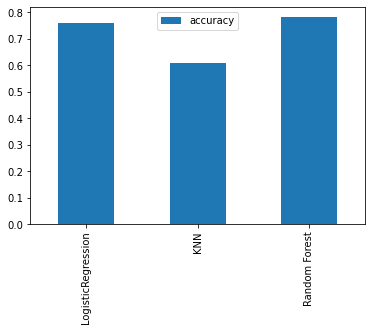

In [84]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

Things to do:
* Hyperparameter tuning
* Feature importance
For classification problems-
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

# Hyperparameter tuning - KNN

In [87]:
# Tuning KNN
train_scores = []
valid_scores = []

# Creating a list of different values for n_neighbors
neighbors = range(1,21)

# Setting up KNN instance
knn = KNeighborsClassifier()

# Looping through the different neighbors - not practical with multiple parameters as it would take a long time
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(transformed_X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(transformed_X_train, y_train))
    
    # Update test scores list
    valid_scores.append(knn.score(transformed_X_valid, y_valid))

In [88]:
train_scores

[1.0,
 0.8047752808988764,
 0.797752808988764,
 0.75,
 0.7429775280898876,
 0.7205056179775281,
 0.723314606741573,
 0.7176966292134831,
 0.7120786516853933,
 0.6980337078651685,
 0.6853932584269663,
 0.6938202247191011,
 0.6938202247191011,
 0.6882022471910112,
 0.6910112359550562,
 0.6882022471910112,
 0.6910112359550562,
 0.6867977528089888,
 0.6938202247191011,
 0.6910112359550562]

In [89]:
valid_scores

[0.6089385474860335,
 0.6256983240223464,
 0.5586592178770949,
 0.6312849162011173,
 0.6089385474860335,
 0.6201117318435754,
 0.6256983240223464,
 0.6201117318435754,
 0.6089385474860335,
 0.6201117318435754,
 0.6368715083798883,
 0.6424581005586593,
 0.659217877094972,
 0.6536312849162011,
 0.6424581005586593,
 0.6201117318435754,
 0.6424581005586593,
 0.659217877094972,
 0.6424581005586593,
 0.6480446927374302]

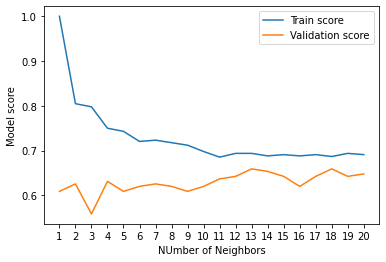

In [90]:
# PLotting the results
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, valid_scores, label = "Validation score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("NUmber of Neighbors")
plt.ylabel("Model score")
plt.legend()

As the highest score of KNN parameter tuning is not better than the others, it will be discarded.

### Hyperparameter tuning with Randomized Search CV